In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
import os
import platform
from PIL import Image
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')

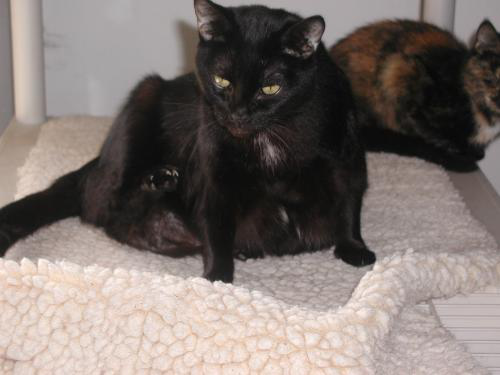

In [12]:
path = ''
with Image.open('../../PYTORCH_NOTEBOOKS/PYTORCH_NOTEBOOKS/Data/CATS_DOGS/CATS_DOGS/test/CAT/10106.jpg') as im:
    display(im)

In [9]:
path = '../../PYTORCH_NOTEBOOKS/PYTORCH_NOTEBOOKS/Data/CATS_DOGS/CATS_DOGS/'
img_names = []

for folder, subfolder, filenames in os.walk(path):
    for img in filenames:
        img_names.append(folder+'/'+img)

In [10]:
len(img_names)

24994

In [13]:
img_sizes = []
rejected = []

for item in img_names:
    try:
        with Image.open(item) as img:
            img_sizes.append(img.size)
    except:
        rejected.append(item)

In [14]:
print(len(img_sizes))
print(len(rejected))

24994
0


Add the tags to the dataframe

In [20]:
data = {'width':[], 'height':[]}
for width, height in img_sizes:
    data['width'].append(width)
    data['height'].append(height)

In [21]:
df = pd.DataFrame(data)

In [22]:
df.head()

,width,height
0,431,360
1,500,375
2,500,471
3,500,375
4,320,240


In [26]:
df['width'].describe() # check the width

count    24994.000000
mean       404.493518
std        108.941802
min         42.000000
25%        323.000000
50%        448.000000
75%        500.000000
max        500.000000
Name: width, dtype: float64

In [27]:
df['height'].describe() # check the width

count    24994.000000
mean       361.037129
std         96.936811
min         33.000000
25%        302.000000
50%        375.000000
75%        421.000000
max        500.000000
Name: height, dtype: float64

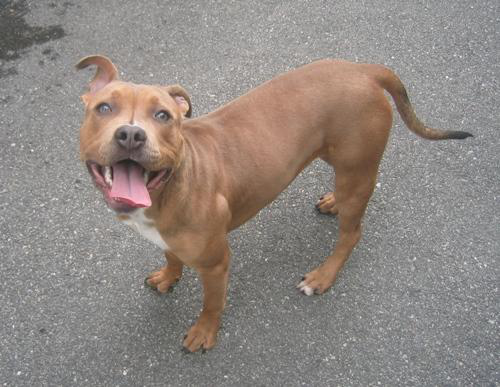

(500, 387)

In [31]:
dog = Image.open('../../PYTORCH_NOTEBOOKS/PYTORCH_NOTEBOOKS/Data/CATS_DOGS/CATS_DOGS/train/DOG/14.jpg')
display(dog)
dog.size

### Get the RGB of a pixel in this case the 0 0 

In [32]:
dog.getpixel((0,0))

(90, 95, 98)

### When you want 1 transformation you use ToTensor but in case you want more you can use Compose

In [39]:
transform = transforms.Compose([
    transforms.ToTensor()
])

im = transform(dog)
print(type(im))
print(im.shape)

<class 'torch.Tensor'>
torch.Size([3, 387, 500])


#### The format for matplotlib is 387 500 3

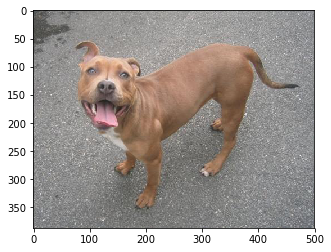

In [40]:
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)))

### Numpy has normalized the values

In [41]:
im[:, 0, 0]

tensor([0.3529, 0.3725, 0.3843])

In [42]:
np.array((90, 95, 98)) / 255

array([0.35294118, 0.37254902, 0.38431373])

#### The Resize tranformation

If there is only one number the smaller edge of the photo it will be equal to this one.
But if you introduce a tuple (32, 32) it will resize all the image to this size

<class 'torch.Tensor'>
torch.Size([3, 1000, 1000])


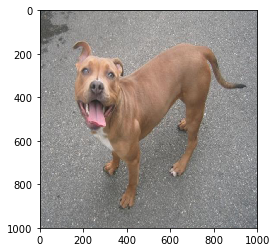

In [50]:
transform = transforms.Compose([
    transforms.Resize((1000, 1000)),
    transforms.ToTensor(),
])

im = transform(dog)
print(type(im))
print(im.shape)

plt.imshow(np.transpose(im.numpy(), (1, 2, 0)))

Center crop what it does is make a square of the size and then put the center of the image inside

<class 'torch.Tensor'>
torch.Size([3, 250, 250])


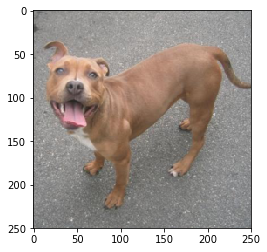

In [52]:
transform = transforms.Compose([
    transforms.Resize(250),
    transforms.CenterCrop(250),
    transforms.ToTensor(),
])

im = transform(dog)
print(type(im))
print(im.shape)

plt.imshow(np.transpose(im.numpy(), (1, 2, 0)))

#### The RandomHorizontalFlip
flips the image based on a probability

<class 'torch.Tensor'>
torch.Size([3, 387, 500])


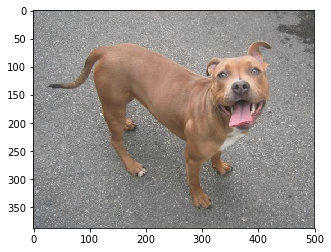

In [63]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=1),
    transforms.ToTensor(),
])

im = transform(dog)
print(type(im))
print(im.shape)

plt.imshow(np.transpose(im.numpy(), (1, 2, 0)))

<class 'torch.Tensor'>
torch.Size([3, 387, 500])


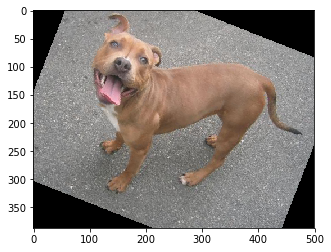

In [62]:
transform = transforms.Compose([
    transforms.RandomRotation(30),
    transforms.ToTensor(),
])

im = transform(dog)
print(type(im))
print(im.shape)

plt.imshow(np.transpose(im.numpy(), (1, 2, 0)))

#### All together

torch.Size([3, 224, 224])


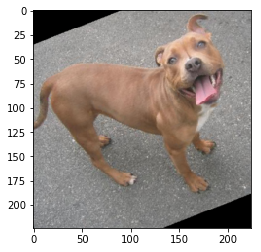

In [64]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=1),  # normally we'd set p=0.5
    transforms.RandomRotation(30),
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor()
])
im = transform(dog)
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

#### Normalization

If you are using otherone pretrained network and you need a specific normalization like -1 to 1 you can use this

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


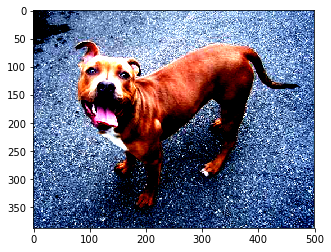

In [65]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

im = transform(dog)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

In [66]:
im

tensor([[[-0.5767, -0.6109, -0.6452,  ...,  0.3652,  0.2111,  0.1597],
         [-0.6965, -0.6281, -0.6623,  ...,  0.3994,  0.2624,  0.1939],
         [-0.8678, -0.7137, -0.6452,  ...,  0.2967,  0.1768,  0.0569],
         ...,
         [ 0.3994,  0.2624, -0.0116,  ...,  0.3652,  0.0912,  0.1597],
         [ 0.5707,  0.4679,  0.0398,  ...,  0.1939,  0.1426,  0.1426],
         [ 0.4679,  0.4337,  0.0741,  ...,  0.4508,  0.6392,  0.5193]],

        [[-0.3725, -0.4076, -0.4426,  ...,  0.5203,  0.3627,  0.3102],
         [-0.4951, -0.4251, -0.4601,  ...,  0.5553,  0.4153,  0.3452],
         [-0.6702, -0.5126, -0.4426,  ...,  0.4503,  0.3277,  0.2052],
         ...,
         [ 0.4678,  0.3277,  0.0826,  ...,  0.5378,  0.2577,  0.3277],
         [ 0.6429,  0.5378,  0.1352,  ...,  0.3627,  0.3102,  0.3102],
         [ 0.5378,  0.5028,  0.1702,  ...,  0.6254,  0.8179,  0.6954]],

        [[-0.0964, -0.1312, -0.1661,  ...,  0.8099,  0.6531,  0.6008],
         [-0.2184, -0.1487, -0.1835,  ...,  0

### Optional: De-normalize the images
To see the image back in its true colors, we can apply an inverse-transform to the tensor being displayed.

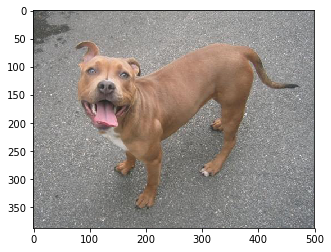

In [67]:
inv_normalize = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
    std=[1/0.229, 1/0.224, 1/0.225]
)
im_inv = inv_normalize(im)
plt.figure(figsize=(12,4))
plt.imshow(np.transpose(im_inv.numpy(), (1, 2, 0)));